# Data analysis

#### Nhập thư viện

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import calmap
import seaborn as sns
import matplotlib.pyplot as plt

#### Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv('Data/sieuanhhungMarvel.csv')

In [3]:
df.head()

post_id                                               text  \
0  734518898719448  Các bạn nam chắc ai cũng muốn học chiêu pause ...   
1  734285772076094  Nếu như Pedro một mình cân tất cả các vai ở Fa...   
2  734234215414583  Sau bom tấn Spider-Man 2 thì dự án tiếp theo c...   
3  734194055418599                                   Infinity Magic 🔥   
4  733990162105655  Nam diễn viên Steven Yeun được xác nhận từ nhi...   

                  time                                         images_low  \
0  2023-11-18 22:40:26  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   
1  2023-11-18 12:51:48  ['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...   
2  2023-11-18 10:21:01  ['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...   
3  2023-11-18 08:30:34  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...   
4  2023-11-17 23:17:50  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   

   like  love  haha  sad  wow  care  angry  reaction_count  shares  comment  \
0  1983    18   801    8    1     6      0            2817      21      101   
1  2014    19  1667   21    4     7      1            3733      13       94   
2  1543    45   275    5    8     5      1            1882       9       51   
3  3997   638    18    4   14    26      1            4698      34       60   
4   732    56   171    1    2     3      1             966       5       56   

                                       comments_full  year  month  day  
0  [{'comment_id': '302120192733098', 'comment_ur...  2023     11   18  
1  [{'comment_id': '361135779633240', 'comment_ur...  2023     11   18  
2  [{'comment_id': '1012246983374962', 'comment_u...  2023     11   18  
3  [{'comment_id': '1842669876147189', 'comment_u...  2023     11   18  
4  [{'comment_id': '1410796539783216', 'comment_u...  2023     11   17

#### Những từ khóa được nhắc đến nhiều trong nội dung của bài post (5/11/2023 - 12/11/2023)

In [4]:
df['time'] = pd.to_datetime(df['time'])

start_date = pd.Timestamp('2023-11-05')
end_date = pd.Timestamp('2023-11-12')

filtered_df = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

text = ""
for i in range(len(filtered_df)):
    text = text + str(filtered_df['text'].iloc[i])

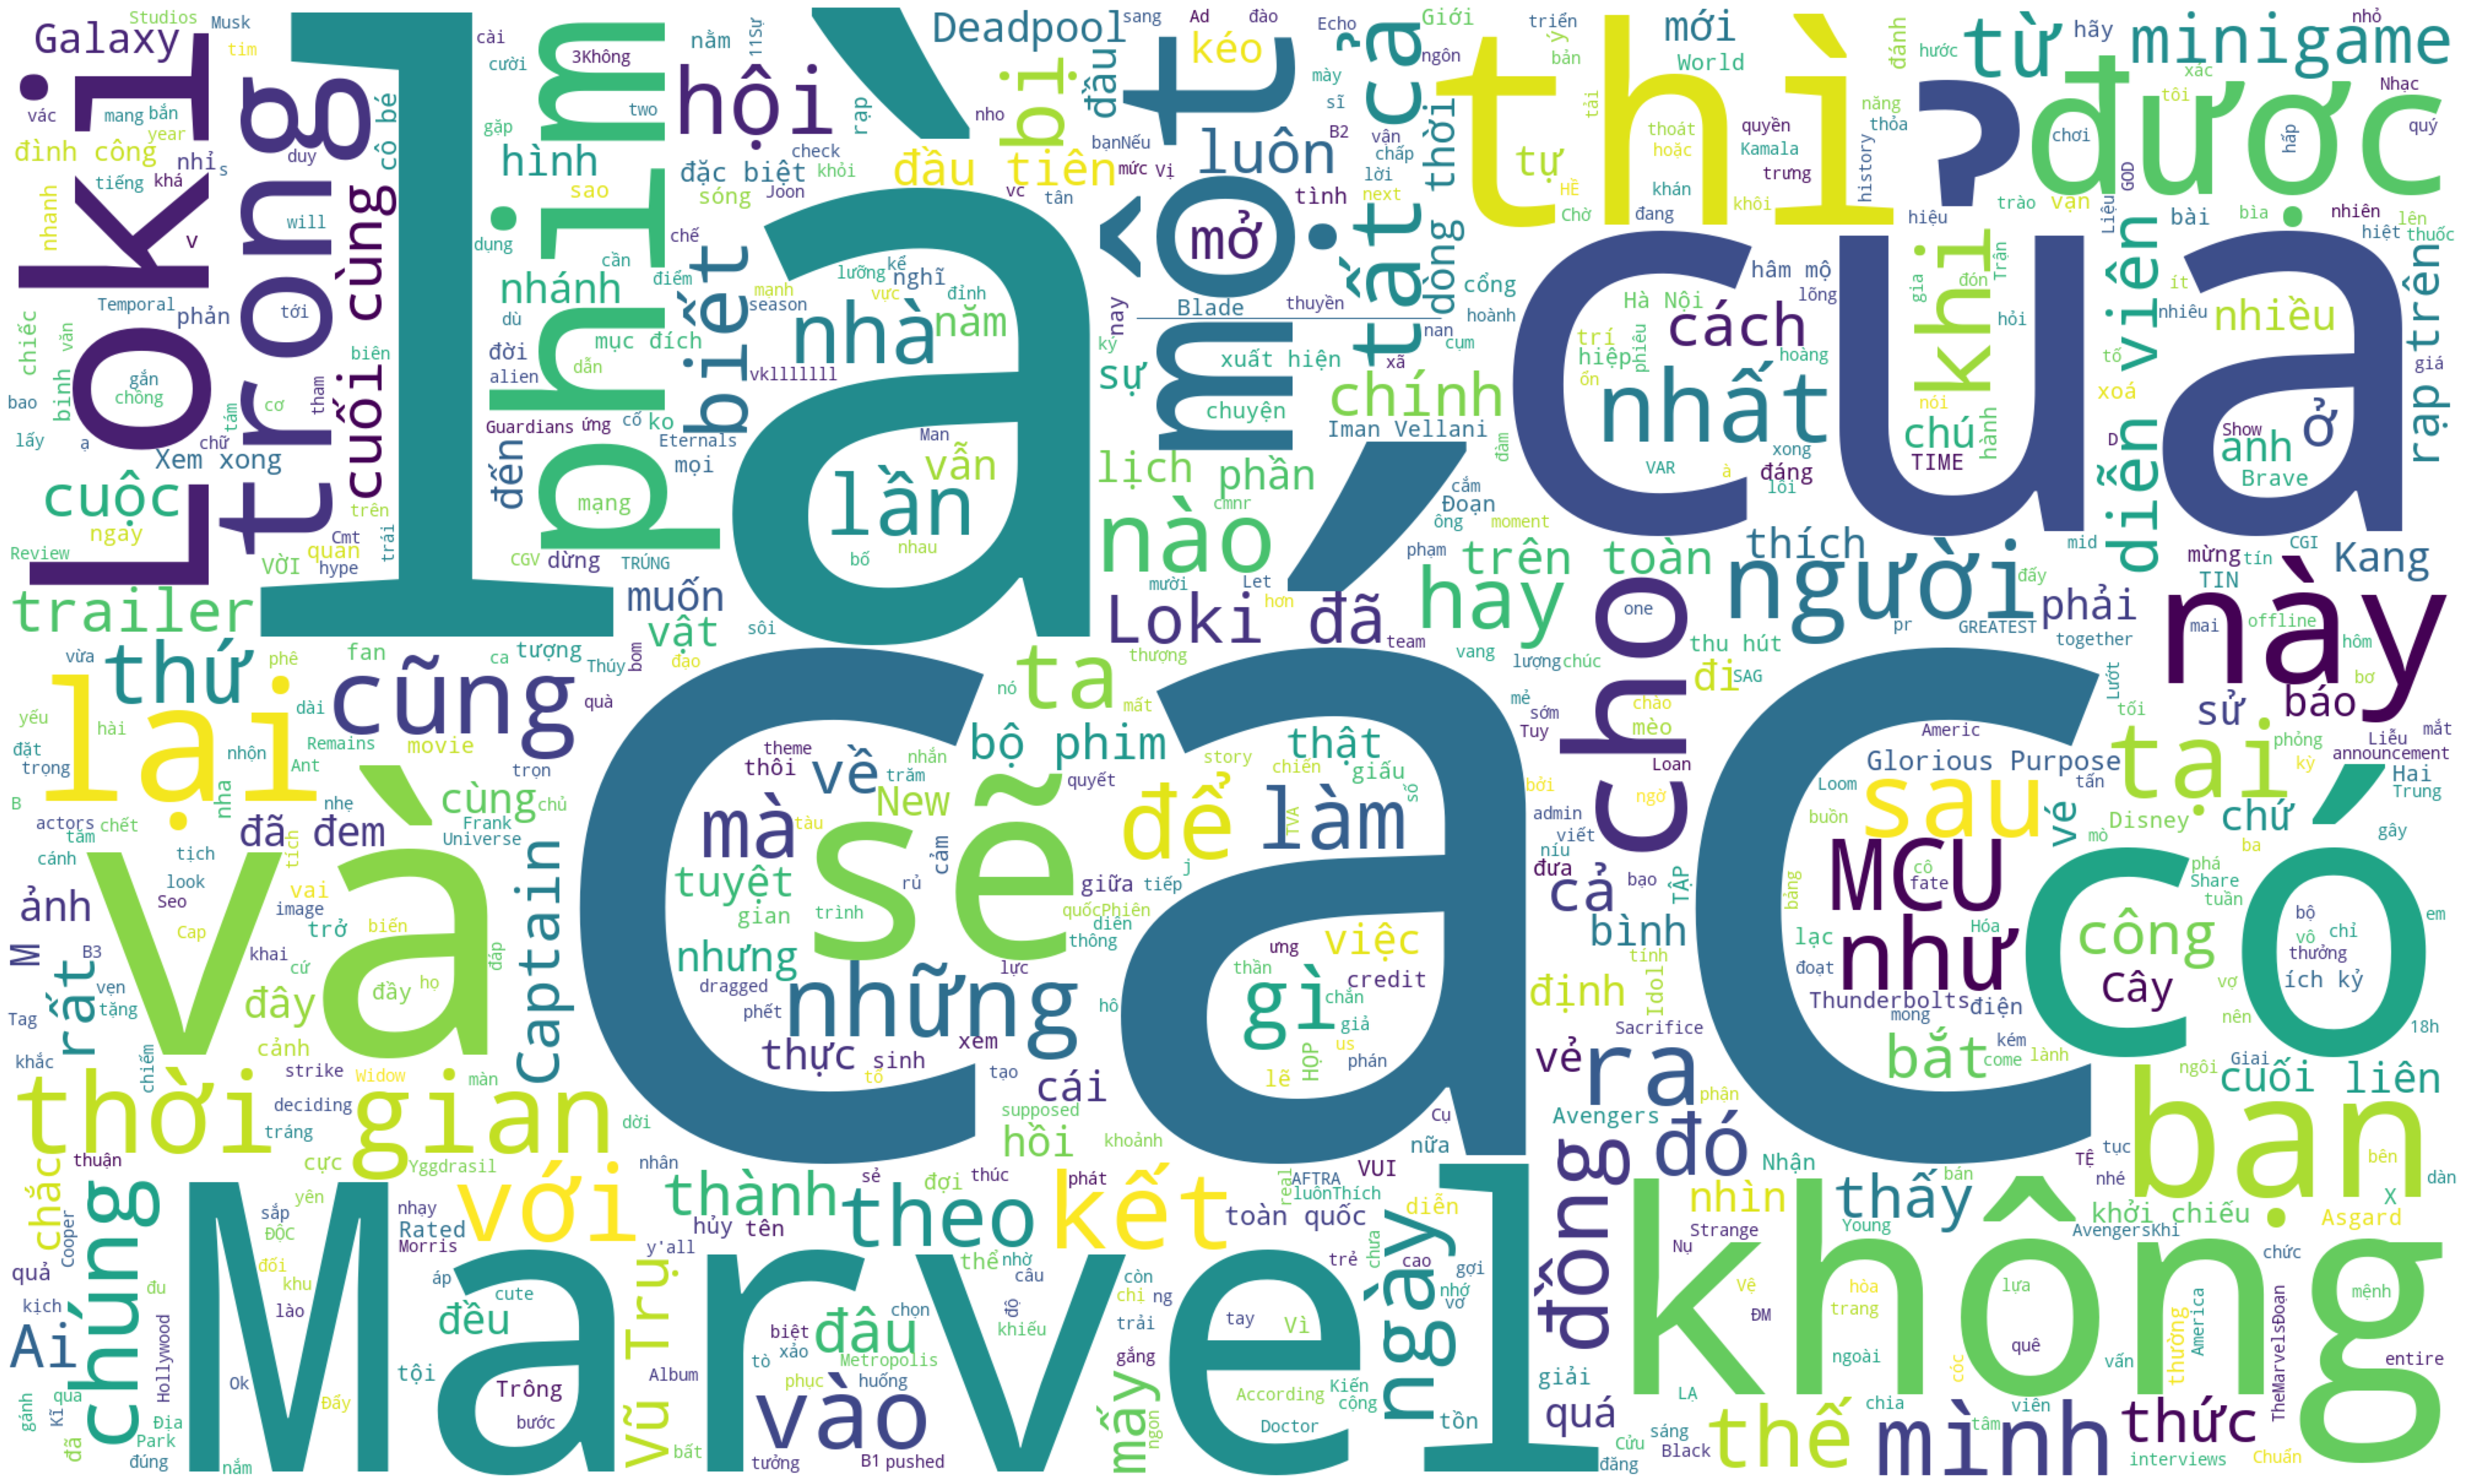

In [5]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=5000,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(50,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### Trung bình lượt like, haha, wow, ... share, comment

In [6]:
average_values = df[['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'shares']].mean()
average_values

like      2477.504630
love       222.875000
haha       873.875000
sad         63.046296
wow         11.050926
care        11.740741
angry        1.314815
shares      36.032407
dtype: float64

#### Tỉ lệ phần trăm các biểu tượng cảm xúc (20/10/2023 - 25/10/2023)

<Figure size 2000x1000 with 0 Axes>

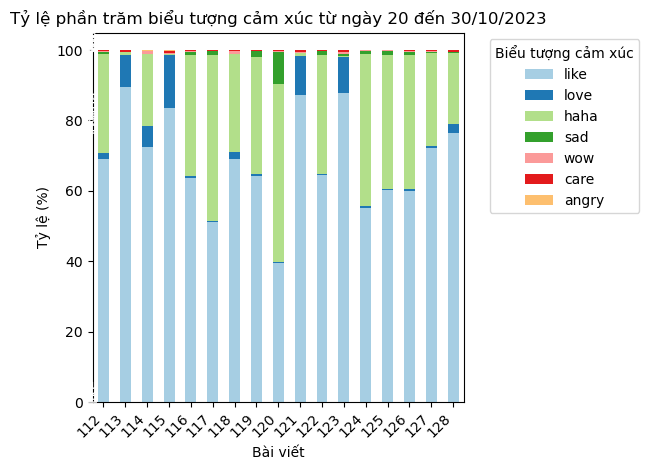

In [7]:
df['time'] = pd.to_datetime(df['time'])

# Lọc dữ liệu từ ngày 20 đến 30/10/2023
start_date = '2023-10-20'
end_date = '2023-10-25'
filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Chọn các cột cần tính tỷ lệ
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']
emotions_data = filtered_data[emotions]

total_reactions = emotions_data.sum(axis=1)

# Tính tỷ lệ phần trăm của mỗi biểu tượng
percentage_data = emotions_data.div(total_reactions, axis=0) * 100


plt.figure(figsize=(20, 10))
colors = plt.cm.Paired(range(len(emotions)))
percentage_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Tỷ lệ phần trăm biểu tượng cảm xúc từ ngày 20 đến 30/10/2023')
plt.xlabel('Bài viết')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Biểu tượng cảm xúc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

for i in range(len(emotions)):
    plt.text(-0.5, sum(percentage_data.iloc[:, :i].iloc[-1]), f'{emotions[i]}', ha='center', va='bottom', rotation='vertical', color='white')

plt.tight_layout()
plt.show()

#### Phương sai giữa các biểu tượng cảm xúc

In [8]:
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']
emotions_data = df[emotions]

variance_data = emotions_data.var()

print(variance_data)

like     4.513623e+06
love     2.137592e+05
haha     2.601010e+06
sad      6.188533e+04
wow      5.842997e+02
care     2.633185e+02
angry    1.249268e+00
dtype: float64


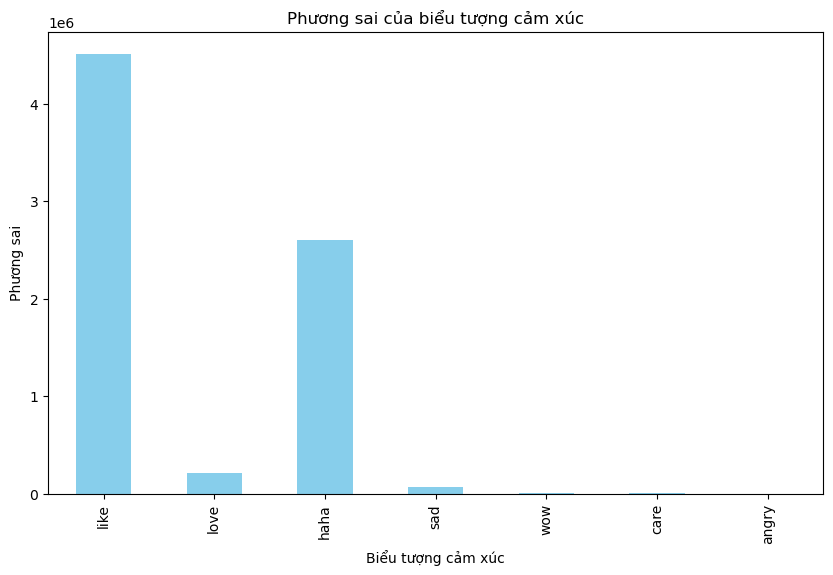

In [9]:
plt.figure(figsize=(10, 6))
variance_data.plot(kind='bar', color='skyblue')
plt.title('Phương sai của biểu tượng cảm xúc')
plt.xlabel('Biểu tượng cảm xúc')
plt.ylabel('Phương sai')
plt.show()

#### Vẽ biểu đồ thể hiện sự thay đổi lượng tương tác theo thời gian

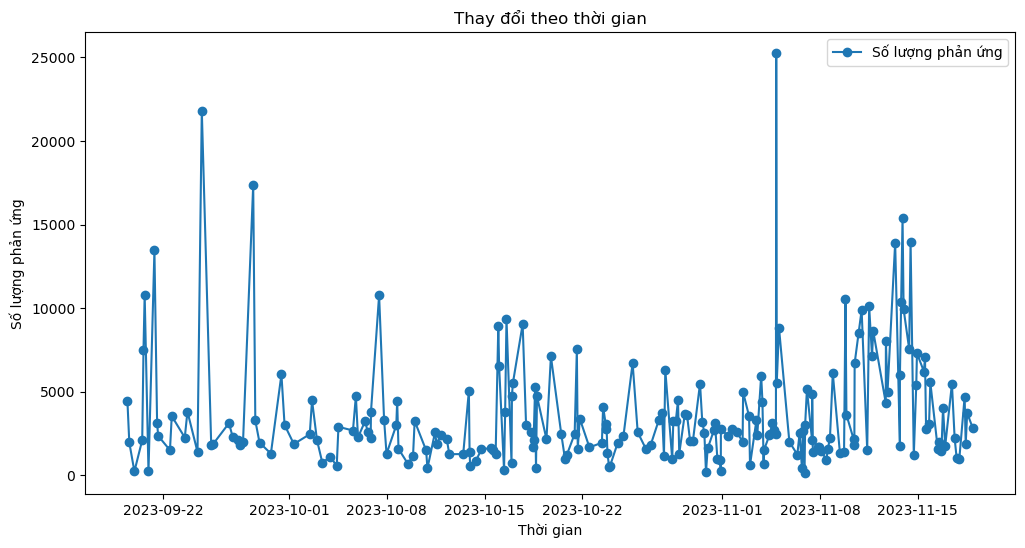

In [10]:
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo cột 'time'
df = df.sort_values(by='time')

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['reaction_count'], label='Số lượng phản ứng', marker='o')
plt.title('Thay đổi theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng phản ứng')
plt.legend()
plt.show()

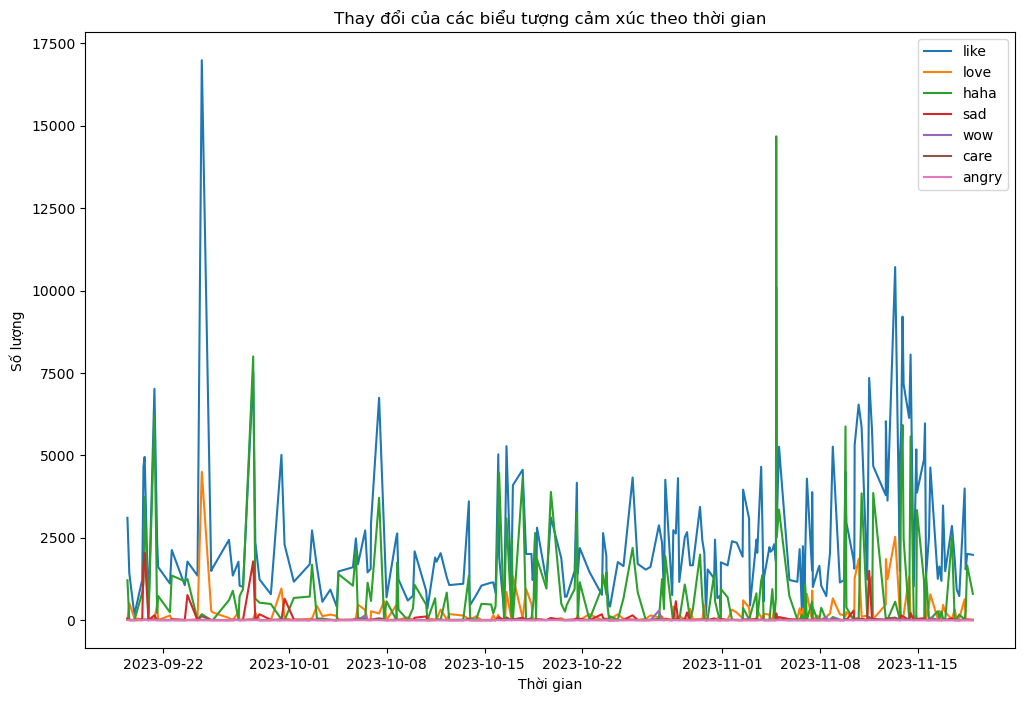

In [11]:
plt.figure(figsize=(12, 8))
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']

for emotion in emotions:
    plt.plot(df['time'], df[emotion], label=emotion)

plt.title('Thay đổi của các biểu tượng cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

#### 

#### Biểu đồ tương quan giữa lượt like và lượt chia sẻ 

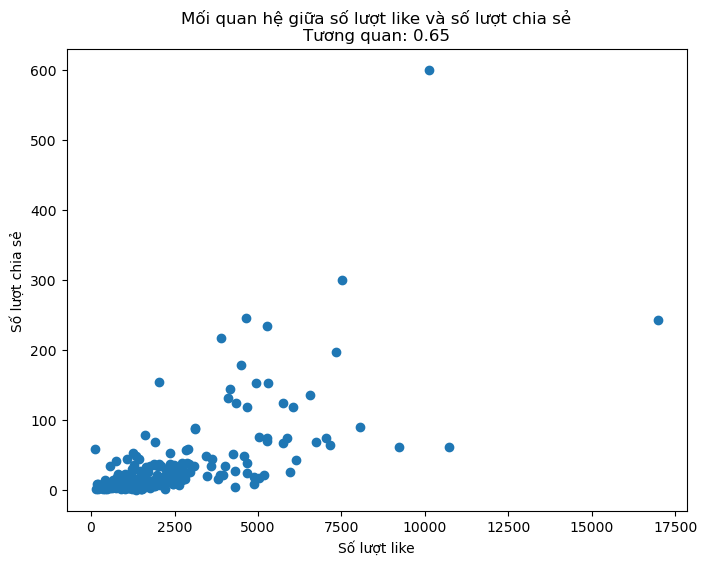

In [12]:
correlation_likes_shares = df['like'].corr(df['shares'])

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['like'], df['shares'])
plt.title(f'Mối quan hệ giữa số lượt like và số lượt chia sẻ\nTương quan: {correlation_likes_shares:.2f}')
plt.xlabel('Số lượt like')
plt.ylabel('Số lượt chia sẻ')
plt.show()

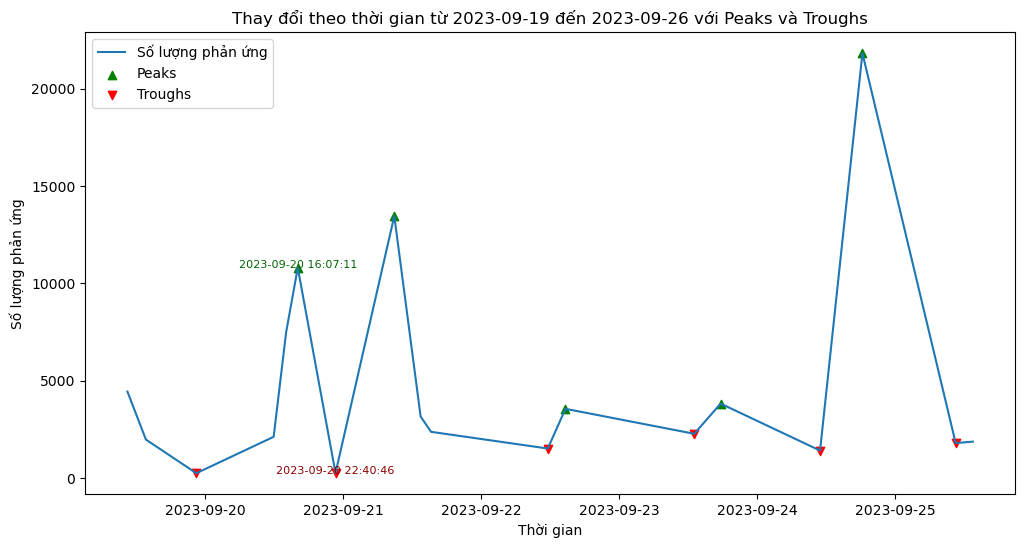

In [13]:
# Filter data for the desired date range
start_date = '2023-09-19'
end_date = '2023-09-26'
df_filtered = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Get the Peaks and Troughs for the filtered data
data = df_filtered['reaction_count'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['time'], df_filtered['reaction_count'], label='Số lượng phản ứng')
plt.scatter(df_filtered['time'].iloc[peak_locations], df_filtered['reaction_count'].iloc[peak_locations], marker='^', color='green', label='Peaks')
plt.scatter(df_filtered['time'].iloc[trough_locations], df_filtered['reaction_count'].iloc[trough_locations], marker='v', color='red', label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df_filtered['time'].iloc[p], df_filtered['reaction_count'].iloc[p] + 15, str(df_filtered['time'].iloc[p]), horizontalalignment='center', color='darkgreen', fontsize=8)
    plt.text(df_filtered['time'].iloc[t], df_filtered['reaction_count'].iloc[t] - 35, str(df_filtered['time'].iloc[t]), horizontalalignment='center', color='darkred', fontsize=8)

# Decoration
plt.title(f'Thay đổi theo thời gian từ {start_date} đến {end_date} với Peaks và Troughs')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng phản ứng')
plt.legend()
plt.show()


#### Biểu đồ tương quan giữa reaction count và comment

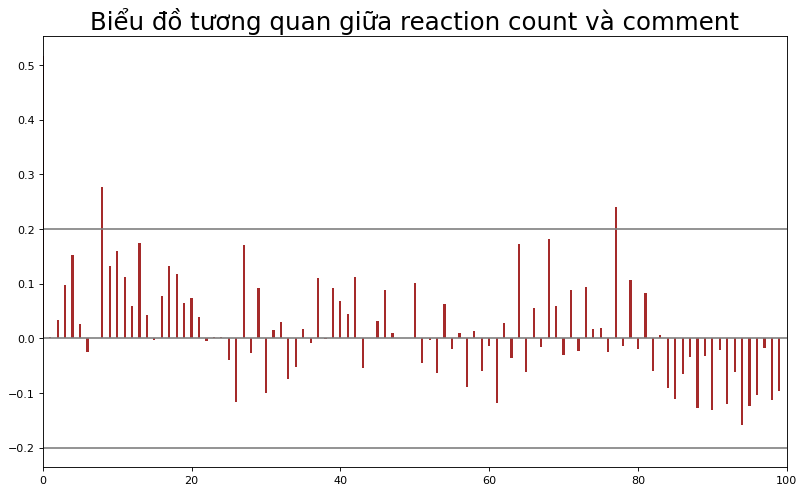

In [14]:
from statsmodels.tsa import stattools

x = df['reaction_count']
y = df['comment']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12, 7), dpi=80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=0.3, color='brown')

# Decoration
plt.title('Biểu đồ tương quan giữa reaction count và comment', fontsize=22)
plt.xlim(0, len(ccs))
plt.show()

#### sự tương quan giữa tháng và các phản ứng

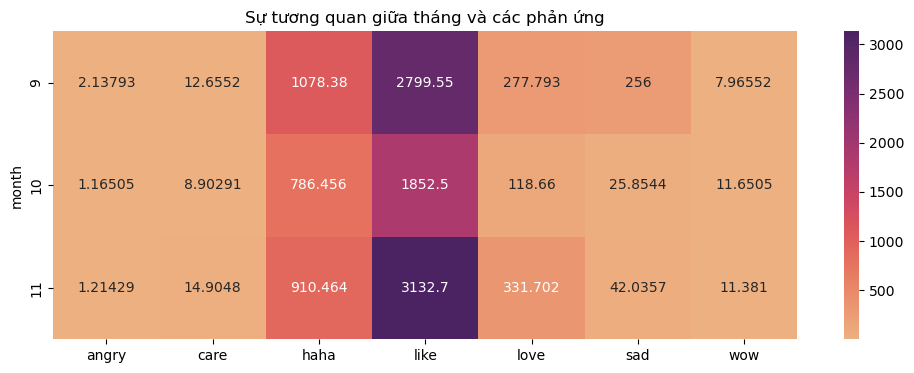

In [28]:
# Chuyển định dạng cột 'month' để đảm bảo rằng nó là kiểu dữ liệu số nguyên
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Tạo một pivot table để có được dữ liệu theo dạng phù hợp với heatmap
heatmap_data = df.pivot_table(index='month', values=['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry'])

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, annot=True, cmap='flare', fmt='g')
plt.title('Sự tương quan giữa tháng và các phản ứng')
plt.show()


#### Sự tương quan giữa các biểu tượng cảm xúc, comment, share

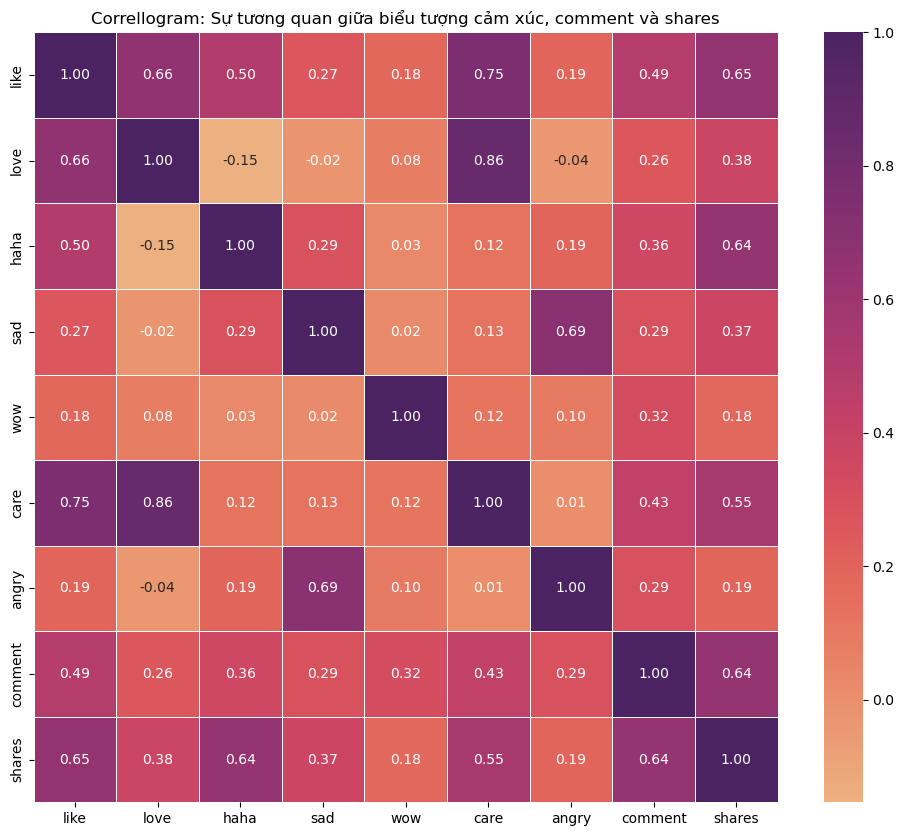

In [27]:
# Chọn các cột cần để tạo correllogram
selected_columns = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'comment', 'shares']

# Tạo một DataFrame con chứa chỉ các cột đã chọn
correlation_data = df[selected_columns]

# Tính ma trận tương quan
correlation_matrix = correlation_data.corr()

# Vẽ correllogram bằng Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=.5)
plt.title('Sự tương quan giữa biểu tượng cảm xúc, comment và shares')
plt.show()

#### Biểu đồ thể hiện sự phân kỳ của các biểu tượng cảm xúc, comment, shares

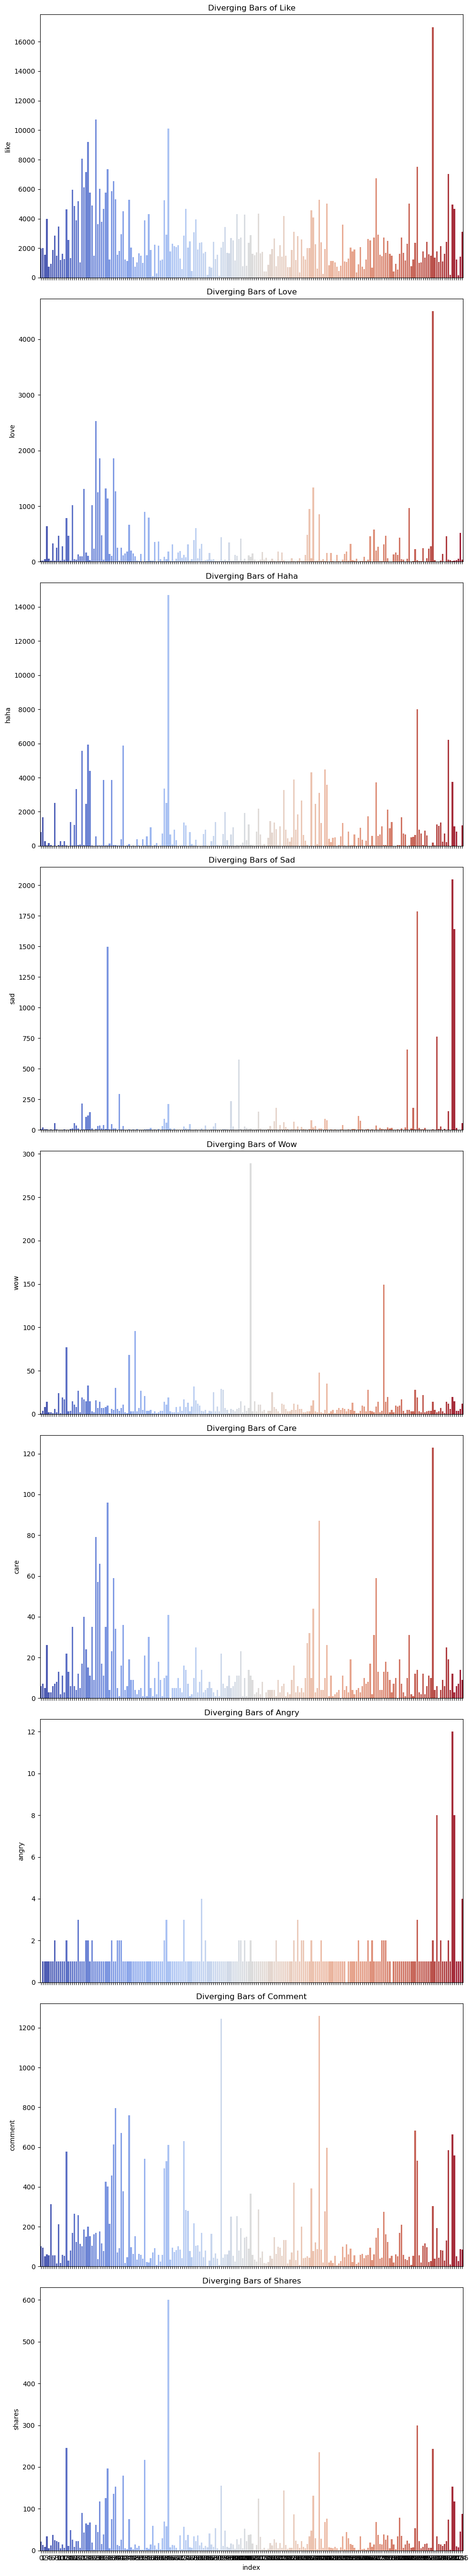

In [45]:
# Chọn các cột quan trọng
selected_columns = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'comment', 'shares']

# Tạo subplot
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(10, 6 * len(selected_columns)), sharex=True)

# Vẽ biểu đồ Diverging Bars cho từng cột
for i, column in enumerate(selected_columns):
    sns.barplot(ax=axes[i], x='index', y=column, data=df.reset_index(), hue='index', palette='coolwarm', legend=False)
    axes[i].set_title(f'Diverging Bars of {column.capitalize()}')

# Decorations
plt.tight_layout()
plt.show()


215    3108
214    1427
213     167
212    1225
211    4665
       ... 
4       732
3      3997
2      1543
1      2014
0      1983
Name: like, Length: 216, dtype: int64